My goal is to identify the Z boson, J/psi meson, and Y meson in the events using a neural network model, but before I do that, I would like to define these particles as follows:

*   Z bosons are fundamental particles responsible for weak force along with W bosons.

*   J/psi meson - the ground state of charmonium - is a subatomic particle, and it is a flavor-neutral meson consisting of a charm quark and a charm antiquark.


*   The ϒ meson is a quarkonium state (i.e. flavorless meson) formed from a bottom quark and its antiparticle.



My research is based on these three particles written as follows (**Zmumu** & **Jpsimumu** & **Ymumu**):




*   **Zmumu** : An event was selected if there were two muons in the event with pT > 20 GeV and |eta| < 2.1 and the invariant mass of the two muons was > 60 GeV and < 120 GeV.


*   **Jpsimumu** : An event was selected if there were two muons in the event, both with |eta| < 2.4, at least one muon was a global muon, the invariant mass of the two muons was > 2 GeV and < 5 GeV, and they have opposite-sign charge.

*   **Ymumu** : An event was selected if there were two muons in the event, both with |eta| < 2.4, at least one muon was a global muon, the invariant mass of the two muons was > 8 GeV and < 12 GeV, and they have opposite-sign charge.






I use three datasets, which are available on the CERN Open Data portal, `Zmumu.csv` with 10,000 records, `Jpsimumu.csv` and `Ymumu.csv`, each of which contains 20,000 records. Datasets derived from the Run2011A. These data were selected from the primary datasets in order to obtain candidate Z boson,  J/psi and Y meson events. More details on datasets can be found in http://opendata.cern.ch/record/545.

I use TensorFlow to create a model that can distinguish between three events (**Zmumu**, **Jpsimumu** & **Ymumu**). To do this, every record in `Zmumu.csv` is labeled with 0, every record in `Jpsimumu.csv` is labeled with 1 and every record in `Ymumu.csv` is labeled with 2. These three datasets are then merged.



Content:

1) Run: The run number of the event.

2) Event: The event number.

3) pt: The transverse momentum of the lepton (in units of GeV), either a muon or an electron.

4) eta: The pseudorapidity of the lepton, either a muon or an electron.

5) phi: The phi angle (in radians) of the lepton, either a muon or an electron.

6) Q: 	The charge of the lepton, either a muon or an electron.




Source: [opendata.cern](http://opendata.cern.ch/record/545)

In [1]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import re, seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
%matplotlib inline

# Read data using pandas

## The first DataFrame (Zmumu)

In [2]:
# Reading data
df_Zmumu = pd.read_csv('/content/drive/MyDrive/Zmumu.csv') # dataframe
# Removing unwanted columns from the original dataset
df_Zmumu = df_Zmumu.drop(['dxy1', 'iso1', 'dxy2', 'iso2'], axis=1)
# Every record in df_Zmunu is labeled with 0
df_Zmumu['class'] = 0 
df_Zmumu.head()

Run     Event      pt1    eta1    phi1  Q1      pt2    eta2    phi2  Q2  \
0  165617  74969122  54.7055 -0.4324  2.5742   1  34.2464 -0.9885 -0.4987  -1   
1  165617  75138253  24.5872 -2.0522  2.8666  -1  28.5389  0.3852 -1.9912   1   
2  165617  75887636  31.7386 -2.2595 -1.3323  -1  30.2344 -0.4684  1.8833   1   
3  165617  75779415  39.7394 -0.7123 -0.3123   1  48.2790 -0.1956  2.9703  -1   
4  165617  75098104  41.2998 -0.1571 -3.0408   1  43.4508  0.5910 -0.0428  -1   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

## The second DataFrame (Jpsimumu) 

In [3]:
# Reading data
df_Jpsimumu = pd.read_csv('/content/drive/MyDrive/Jpsimumu.csv') # dataframe
# Removing unwanted columns from the original dataset
df_Jpsimumu = df_Jpsimumu.drop(['type1', 'type2', 'E1', 'E2', 'px1', 'px2', 'py1', 'py2', 'pz1', 'pz2'], axis=1)
# Every record in df_Jpsimumu is labeled with 1
df_Jpsimumu['class'] = 1
df_Jpsimumu.head()

Run     Event      pt1    eta1    phi1  Q1      pt2    eta2    phi2  Q2  \
0  165617  75206813   8.5297  0.6091 -1.5149  -1  14.2550  0.8539 -1.3766   1   
1  165617  75678475  15.1536 -0.3083 -0.1102   1  11.9330 -0.0071 -0.0643  -1   
2  165617  74428554  12.7111  1.1357  2.0823  -1  18.4743  1.3076  2.1877   1   
3  165617  75193169   6.2230 -1.8084 -1.1111   1   6.3190 -1.5050 -1.3226  -1   
4  165617  74832715   4.9657  1.0710 -0.3793  -1   0.8688  2.0742  2.2276   1   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

## The third DataFrame (Ymumu) 

In [4]:
# Reading data
df_Ymumu = pd.read_csv('/content/drive/MyDrive/Ymumu.csv') # dataframe
# Removing unwanted columns from the original dataset
df_Ymumu = df_Ymumu.drop(['type1', 'type2', 'E1', 'E2', 'px1', 'px2', 'py1', 'py2', 'pz1', 'pz2'], axis=1)
# Every record in df_Ymumu is labeled with 2 
df_Ymumu['class'] = 2 
df_Ymumu.head()

Run     Event     pt1    eta1    phi1  Q1     pt2    eta2    phi2  Q2  \
0  165617  75100943  4.2910 -0.9121  3.0350  -1  7.8019 -0.6786 -0.3700   1   
1  165617  75587682  4.2622  2.1905 -2.9881  -1  4.3697  1.4497 -0.1086   1   
2  165617  75167029  4.4744  1.4156 -1.0072  -1  6.2039  1.4187  2.1503   1   
3  165617  75281957  5.6769  1.1213 -1.2756   1  4.7366  0.9473  1.9255  -1   
4  165617  75393376  4.4318  0.8208  0.7098  -1  5.8731  0.7806 -2.6030   1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2

# Combining three DataFrame with `concat()`

In [5]:
frames = [df_Zmumu, df_Jpsimumu, df_Ymumu]  
result = pd.concat(frames)
df = result.sample(50000, random_state=42) 
df = df.reset_index(drop=True)
df.head(10) 

Run       Event      pt1    eta1    phi1  Q1      pt2    eta2    phi2  \
0  166784    36730798   4.2362 -1.5355 -2.5374   1   4.5266 -0.1471  0.8668   
1  173381   235639602  52.0730 -1.5158 -1.1064  -1  72.1806 -0.4573 -2.1850   
2  165617   113715929  35.5514  1.8226 -2.9752   1  32.6190  0.2415 -0.0120   
3  163589     9909954  10.3875  1.5009 -2.7046   1  13.8414  1.3871 -2.8691   
4  166033   477521388   6.3022 -1.3838  0.4081   1   3.9905 -1.5073 -2.4499   
5  167807  1091272061   5.2691  0.1976  3.0570  -1   5.7262  0.7549  0.0220   
6  165617   157913521  12.1445 -1.9813 -2.5318   1   1.2289 -2.2291  2.7002   
7  165548   623665589   6.9770 -1.5108 -1.7296  -1   4.1062 -1.0440  1.1462   
8  173692   577508001  19.4346  1.5355  1.1106   1  27.3441 -0.8936 -2.0128   
9  163589    52723332   4.8240  0.1167  2.3932   1   4.1632  0.5392 -0.6521   

   Q2  class  
0  -1      2  
1   1      0  
2  -1      0  
3  -1      1  
4  -1      2  
5   1      2  
6  -1      1  
7   1      2  
8  -1      0  
9  -1      2

# In order to work with DataFrame, I need to know what type of data I am working with. I check that by using the `dtypes`.

In [6]:
df.dtypes

Run        int64
Event      int64
pt1      float64
eta1     float64
phi1     float64
Q1         int64
pt2      float64
eta2     float64
phi2     float64
Q2         int64
class      int64
dtype: object

# The DataFrame contains 50,000 records with 11 columns.

In [7]:
df.shape

(50000, 11)

# Testing DataFrame for NaN values

In [8]:
df.isnull().any().any()

False

## It does not contain any NaN values

# To determine which features have the greatest impact on a class, I use Seaborn's `heatmap()` function.

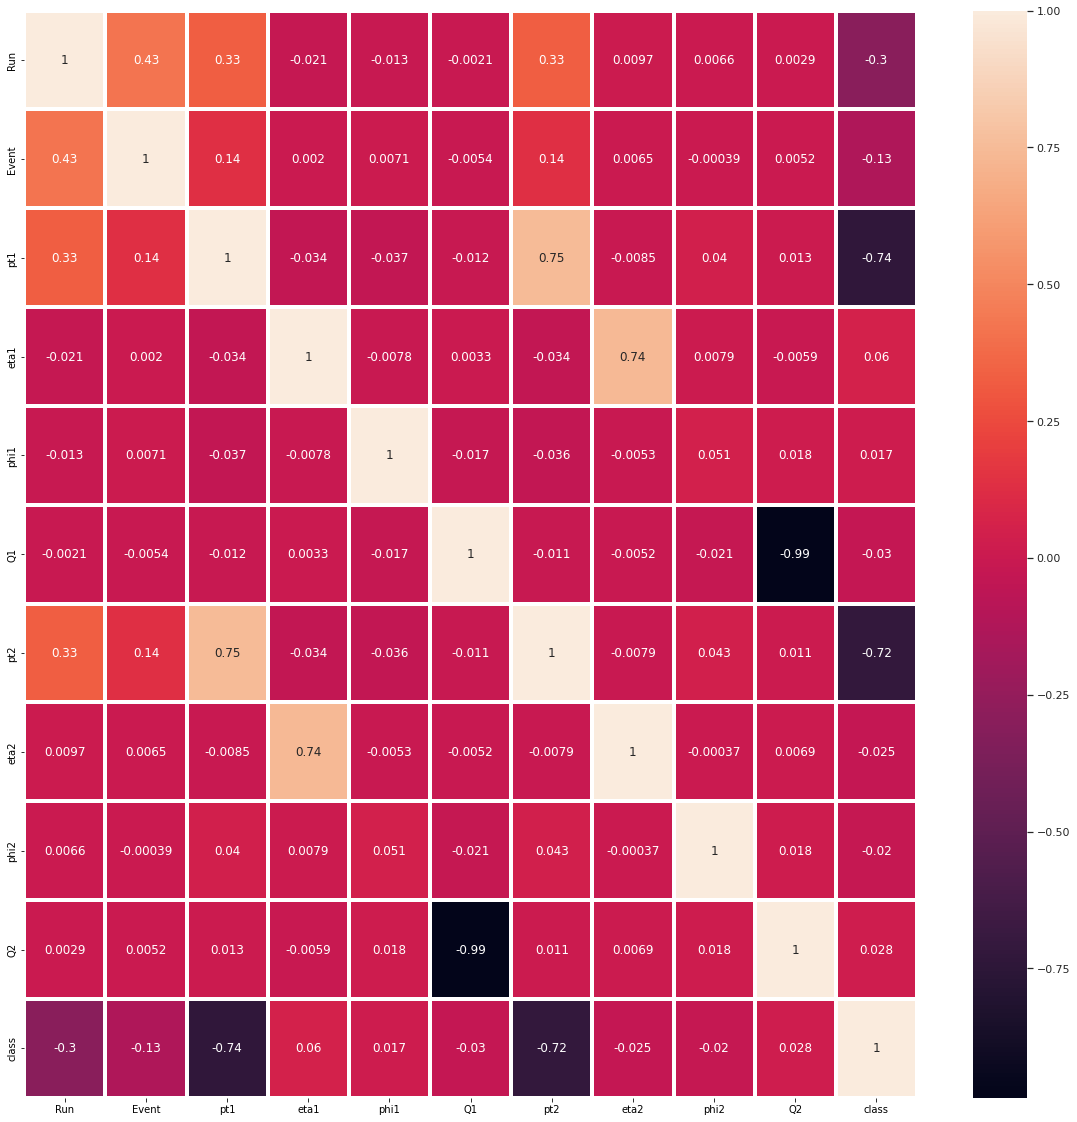

In [9]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax)

# Data Visualization and Analysis:

<Figure size 1440x720 with 0 Axes>

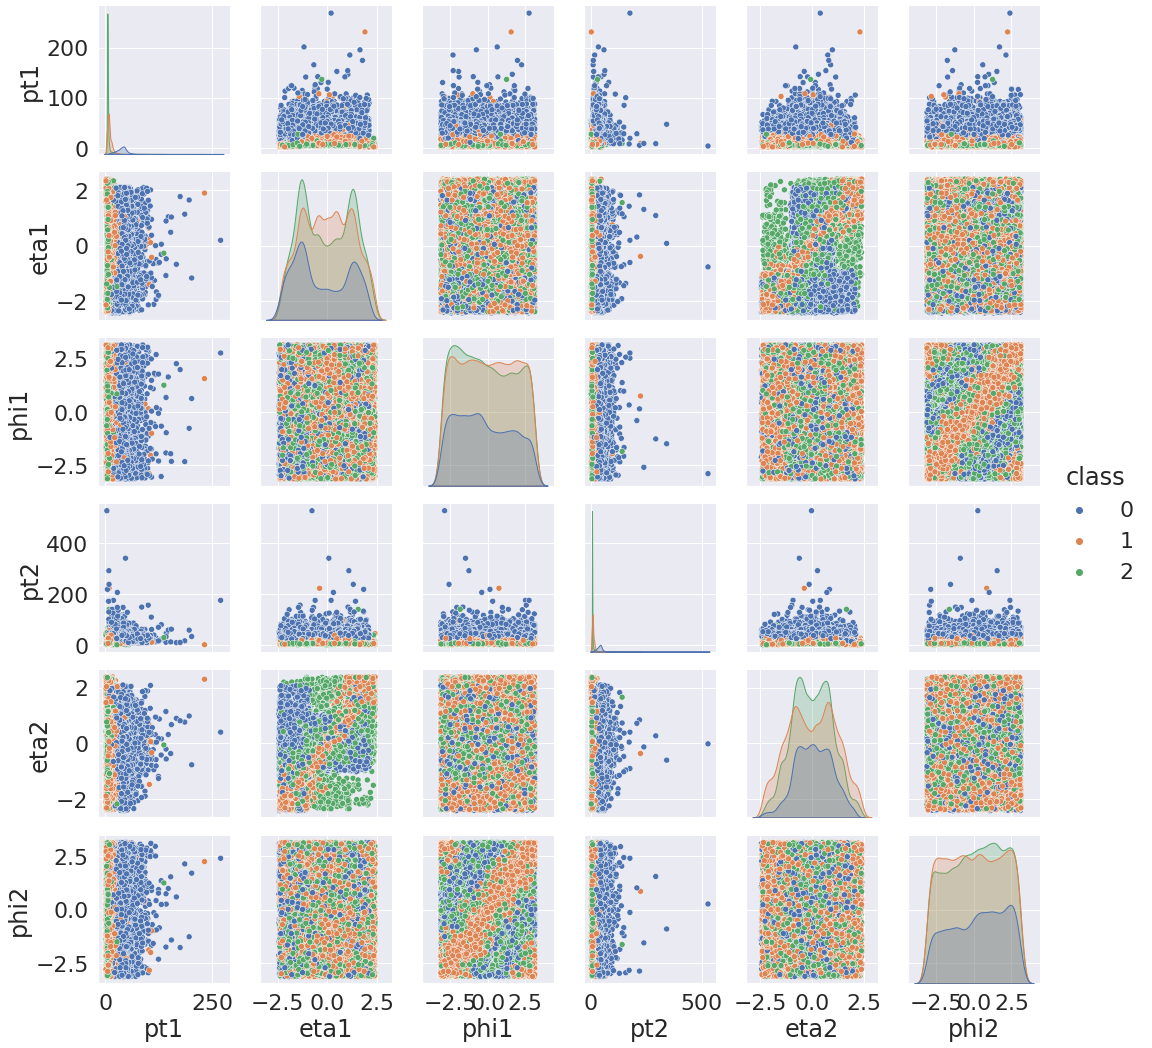

In [10]:
df1 = df[['pt1', 'eta1', 'phi1', 'pt2', 'eta2', 'phi2', 'class']]
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df1, hue="class", palette="deep")

By default, this function will create a grid of Axes such that each numeric variable in df1 will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. source : [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

# Histogram

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins. source : [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

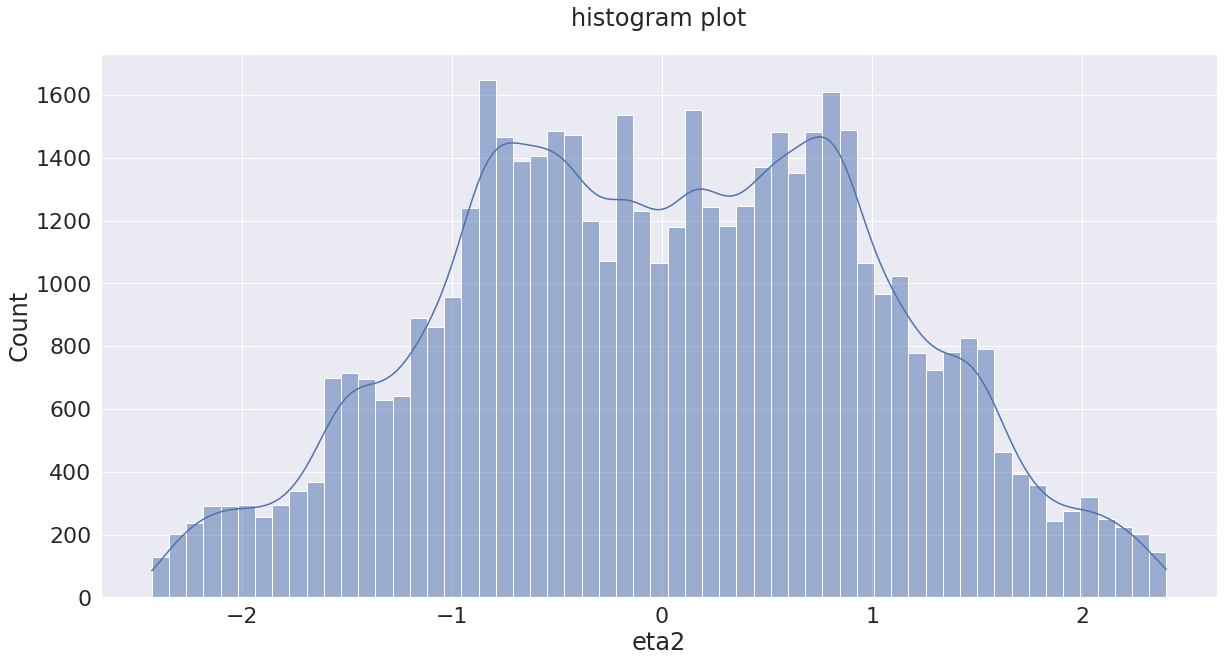

In [11]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("histogram plot", y=1.04)
sns.histplot(data=df, x="eta2", kde=True)

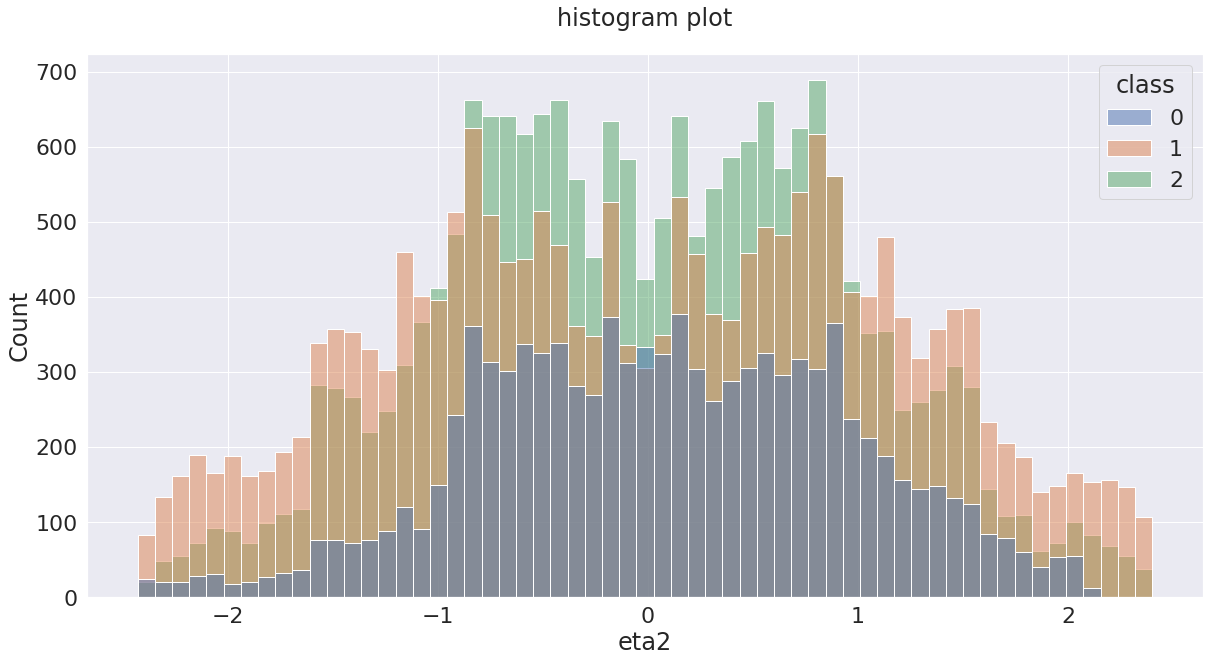

In [12]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("histogram plot", y=1.04)
sns.histplot(data=df, x="eta2", hue="class", palette="deep")

# kdeplot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. source : [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) 

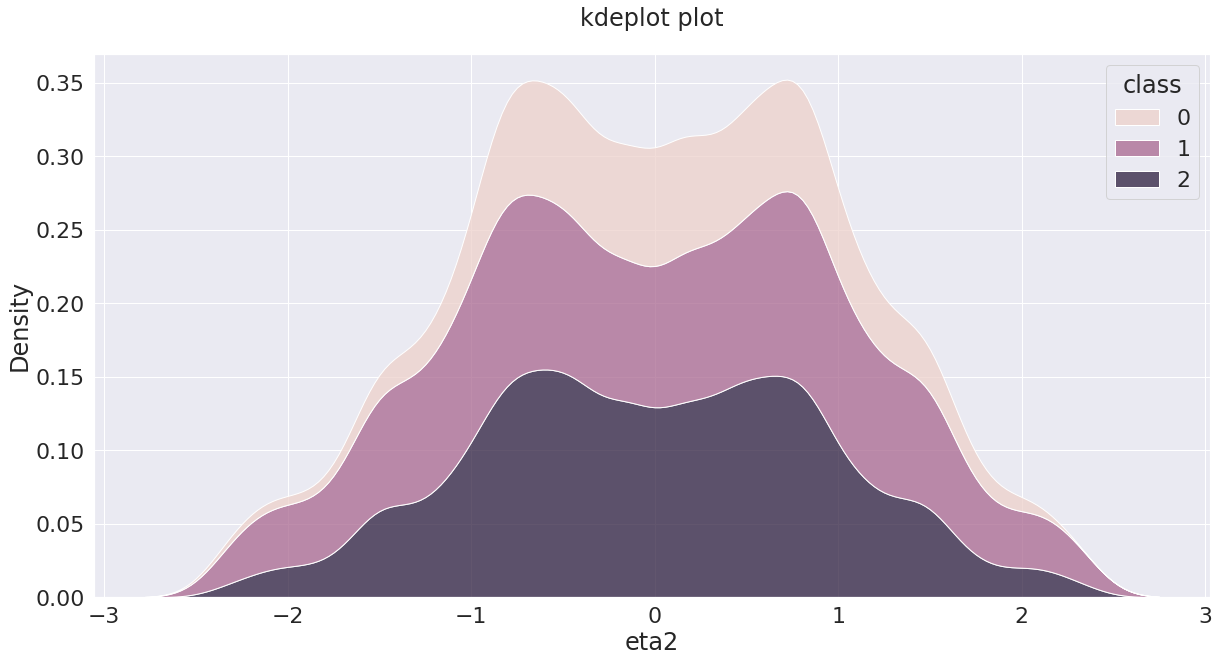

In [13]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("kdeplot plot", y=1.04)
sns.kdeplot(data=df, x="eta2", hue="class", multiple="stack")

# Scatter plots in 2D


## 1. `eta2` vs `eta1` 

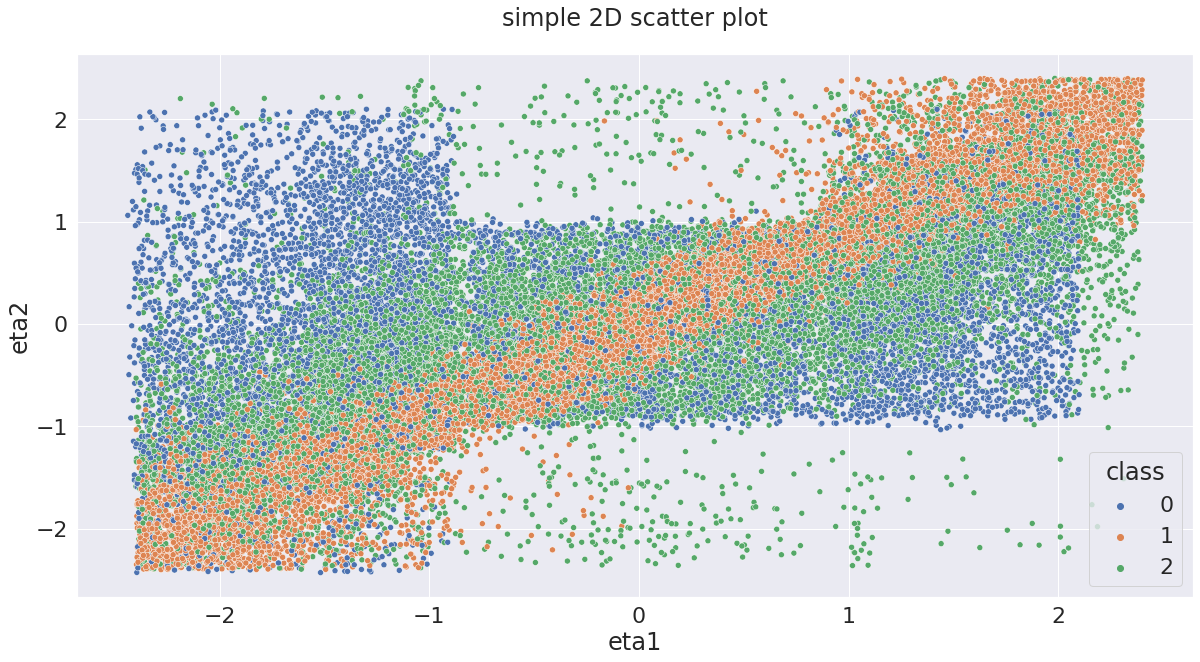

In [14]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='eta1', y='eta2', hue='class', palette="deep")

## 2. `phi2` vs `phi1`



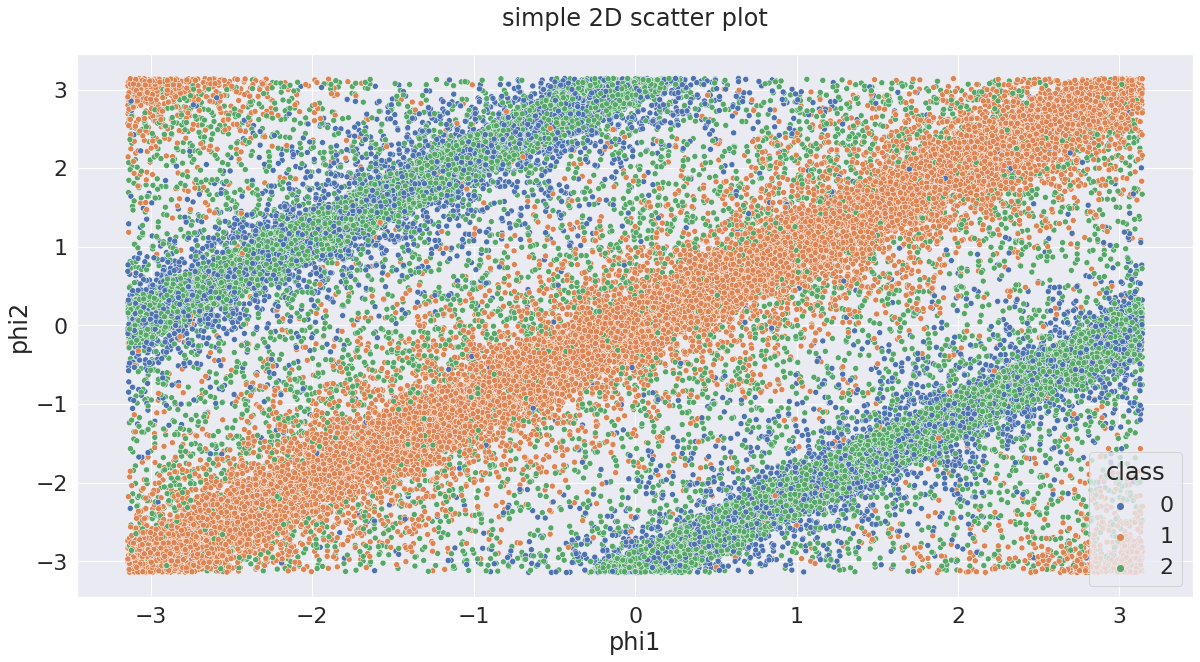

In [15]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='phi1', y='phi2', hue='class', palette="deep")

# I will then use TensorFlow to build a model that allows me to distinguish between three events (**Zmumu**, **Jpsimumu**, **Ymumu**). 

## First of all, I split the DataFrame into X (data) and Y (label), where:

In [16]:
X = df.drop(['class', 'pt1', 'pt2'], axis=1)
y = df['class']  

## Using a train-test split, I split X and Y into train and test data.


*   Train Dataset: Used to fit model.
*   Test Dataset: Used to evaluate the fit model.



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## TensorFlow
The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor.

## To convert DataFrame to a tensor, I use tf.convert_to_tensor

In [18]:
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(40000, 8), dtype=float64, numpy=
array([[ 1.66784000e+05,  3.44301170e+07, -5.51100000e-01, ...,
        -5.32500000e-01, -5.30000000e-01,  1.00000000e+00],
       [ 1.63589000e+05,  2.01461520e+07,  9.75200000e-01, ...,
         6.33900000e-01,  3.01500000e+00,  1.00000000e+00],
       [ 1.65617000e+05,  1.30566294e+08,  7.77000000e-01, ...,
         4.82400000e-01,  2.32560000e+00, -1.00000000e+00],
       ...,
       [ 1.73430000e+05,  1.98354702e+08, -1.28530000e+00, ...,
        -1.07460000e+00,  1.39840000e+00, -1.00000000e+00],
       [ 1.60957000e+05,  1.63003400e+07, -2.28500000e-01, ...,
        -1.69600000e+00,  2.96780000e+00,  1.00000000e+00],
       [ 1.65548000e+05,  6.14280031e+08, -1.21040000e+00, ...,
        -1.60980000e+00,  1.33570000e+00, -1.00000000e+00]])>

In [19]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(10000, 8), dtype=float64, numpy=
array([[ 1.67807000e+05,  1.06401188e+09, -1.20600000e-01, ...,
        -2.13900000e-01,  4.04600000e-01,  1.00000000e+00],
       [ 1.66784000e+05,  3.13029430e+07, -1.08290000e+00, ...,
        -3.15800000e-01, -1.52490000e+00,  1.00000000e+00],
       [ 1.63796000e+05,  1.06851828e+08,  7.41000000e-02, ...,
         1.80400000e-01, -7.40000000e-01, -1.00000000e+00],
       ...,
       [ 1.60957000e+05,  8.85782190e+07, -5.20100000e-01, ...,
        -3.06300000e-01,  1.41720000e+00, -1.00000000e+00],
       [ 1.66033000e+05,  5.24517895e+08,  1.22160000e+00, ...,
         9.79900000e-01,  2.17860000e+00, -1.00000000e+00],
       [ 1.66895000e+05,  3.38957502e+08, -1.84830000e+00, ...,
        -1.72810000e+00, -2.63600000e-01, -1.00000000e+00]])>

## Normalize X_train, X_test

In [20]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)

In [21]:
X_test_scaled = tf.keras.layers.Normalization(axis=-1)
X_test_scaled.adapt(X_test)

## Building a simple neural network model
The compile function takes three arguments: optimizer, loss, and metrics.


*   **Optimizer**: These are certain algorithms that are used to change the attributes of the neural network to decrease the loss rate.
*   **Loss**: This is used to compute the quantity that a model should seek to minimize during training.


*   **Metrics**: This is used to judge the performance of the model.





## Model: There are two hidden layers, each with `128 neurons` and an activation function of `sigmoid`, `epochs = 500` and `batch_size=100`.

In [22]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), batch_size=100) 

Epoch 1/500
400/400 [==============================] - 3s 5ms/step - loss: 1.0031 - accuracy: 0.4548 - val_loss: 0.9887 - val_accuracy: 0.4697
Epoch 2/500
400/400 [==============================] - 2s 4ms/step - loss: 0.9836 - accuracy: 0.4734 - val_loss: 0.9822 - val_accuracy: 0.4835
Epoch 3/500
400/400 [==============================] - 2s 4ms/step - loss: 0.9809 - accuracy: 0.4747 - val_loss: 0.9753 - val_accuracy: 0.4666
Epoch 4/500
400/400 [==============================] - 2s 4ms/step - loss: 0.9716 - accuracy: 0.4839 - val_loss: 0.9620 - val_accuracy: 0.4727
Epoch 5/500
400/400 [==============================] - 2s 4ms/step - loss: 0.9412 - accuracy: 0.5265 - val_loss: 0.8944 - val_accuracy: 0.5930
Epoch 6/500
400/400 [==============================] - 2s 4ms/step - loss: 0.7327 - accuracy: 0.7326 - val_loss: 0.5905 - val_accuracy: 0.7906
Epoch 7/500
400/400 [==============================] - 2s 4ms/step - loss: 0.5764 - accuracy: 0.7894 - val_loss: 0.5578 - val_accuracy: 0.7967

## Evaluating the model
I create plots from the collected history data.


*   A plot of accuracy on the training and validation datasets over training epochs.
*   A plot of loss on the training and validation datasets over training epochs.



313/313 - 1s - loss: 0.3734 - accuracy: 0.8674 - 547ms/epoch - 2ms/step


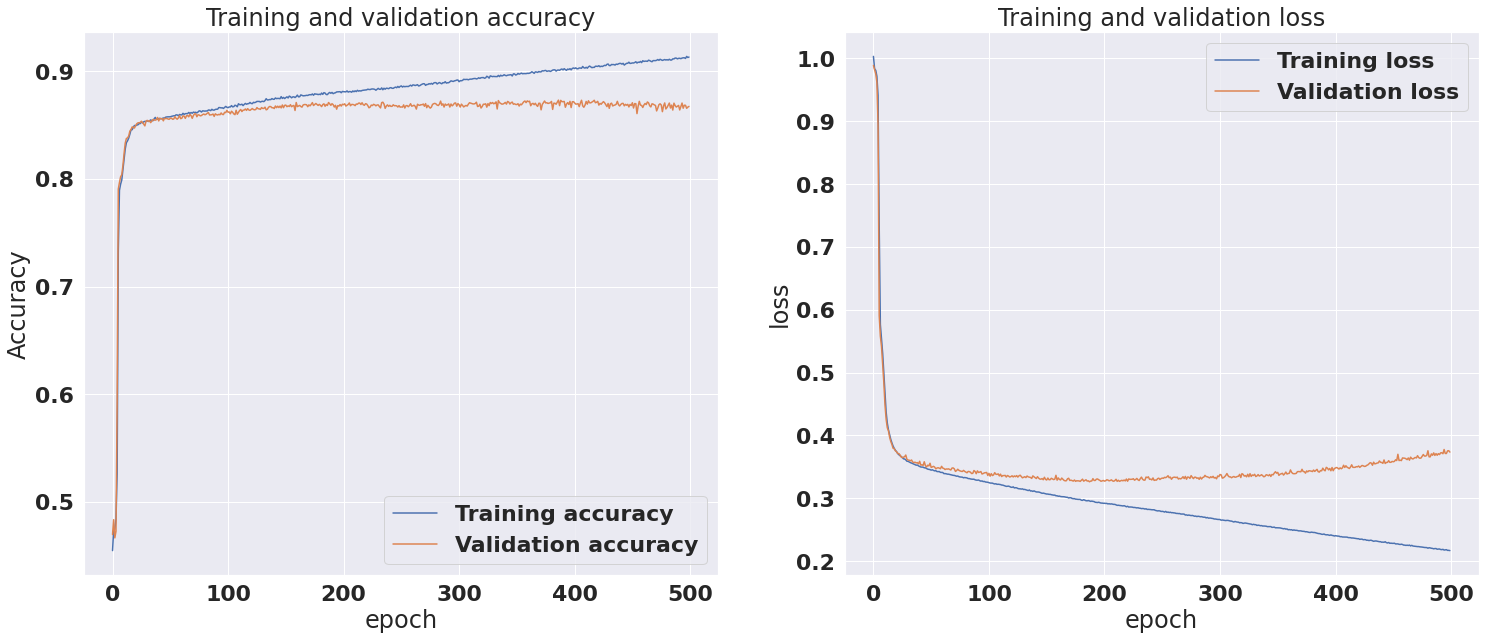

In [23]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(25,10))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

According to the plot of loss, validation loss is decreasing before the 200th epoch, so the model is underfitting. However, after the 200th epoch, validation loss is increasing, which indicates the model is overfitting. At the 200th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 87%. The goal of Deep Learning training is to find a balance between a model that is underfitting and one that is overfitting(converging), resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 200th epoch, as shown above. At that point, the training process can be stopped.